In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# just for Women
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Age Outlier')

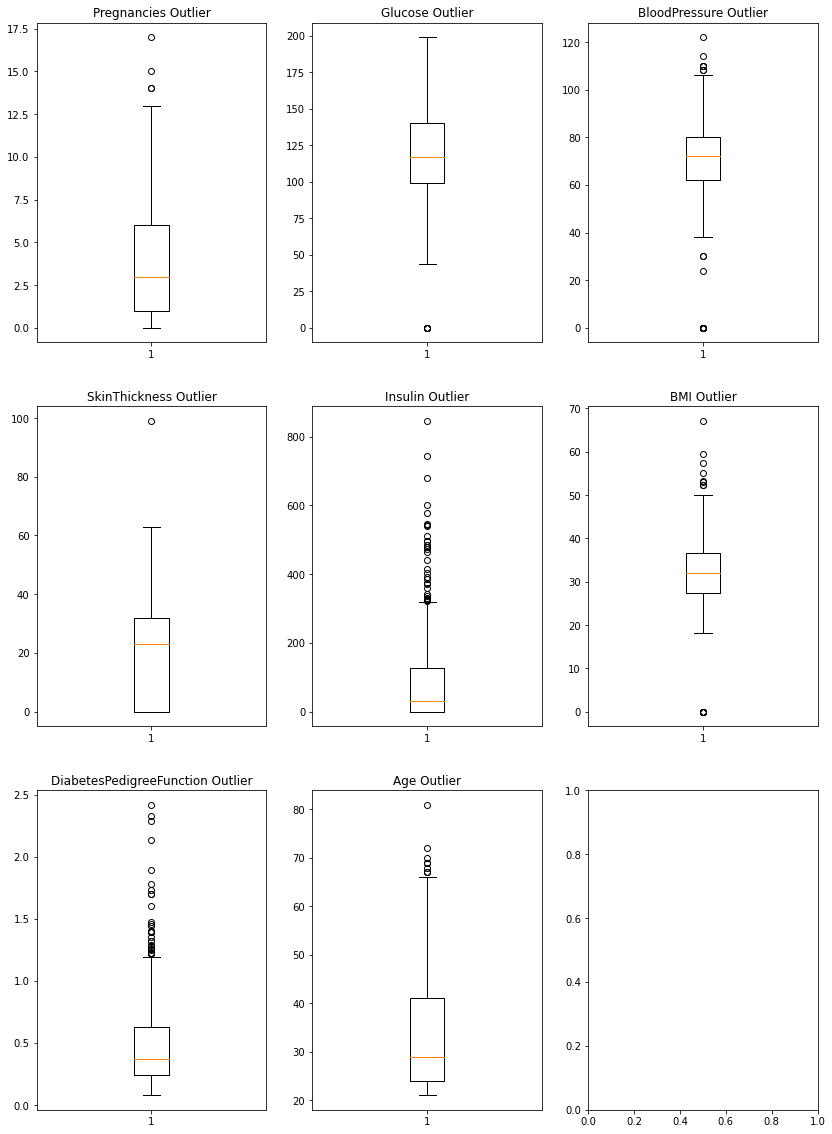

In [4]:
fig, [[ax1, ax2, ax3], [ax4 ,ax5, ax6], [ax7, ax8, ax9 ]] = plt.subplots(nrows=3, ncols=3,
                               figsize=(14, 20))

ax1.boxplot(df['Pregnancies'])
ax1.set_title('Pregnancies Outlier')

ax2.boxplot(df['Glucose'])
ax2.set_title('Glucose Outlier')

ax3.boxplot(df['BloodPressure'])
ax3.set_title('BloodPressure Outlier')

ax4.boxplot(df['SkinThickness'])
ax4.set_title('SkinThickness Outlier')

ax5.boxplot(df['Insulin'])
ax5.set_title('Insulin Outlier')

ax6.boxplot(df['BMI'])
ax6.set_title('BMI Outlier')

ax7.boxplot(df['DiabetesPedigreeFunction'])
ax7.set_title('DiabetesPedigreeFunction Outlier')

ax8.boxplot(df['Age'])
ax8.set_title('Age Outlier')


C:\Users\Pishtaz\anaconda3\envs\tf\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

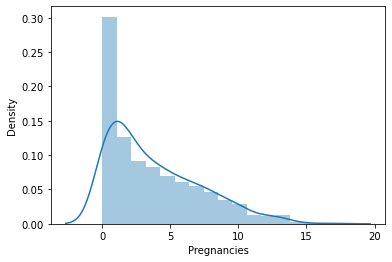

In [5]:
sns.distplot(df['Pregnancies'])

In [6]:
# print Just For Be Clear Underestanding
def detect_outlier(data):
    q1 = np.quantile(data, 0.25)
    print('0.25: ', q1)
    q3 = np.quantile(data, 0.75)
    print('0.75:', q3)
    iqr = q3 - q1 
    low = q1 - (1.5 * iqr)
    ## we does not care about minus values
    #if low <= 0:
    #    low = q1
    #else:
    #    pass
    print('bottom:', low)
    high = q3 + (1.5 * iqr)
    print('ceiling:', high)
    return high, low 

0.25:  1.0
0.75: 6.0
bottom: -6.5
ceiling: 13.5


<AxesSubplot:ylabel='Frequency'>

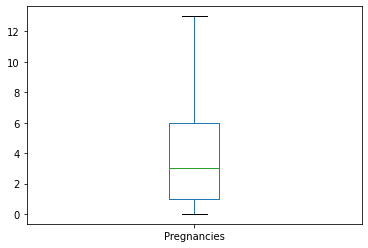

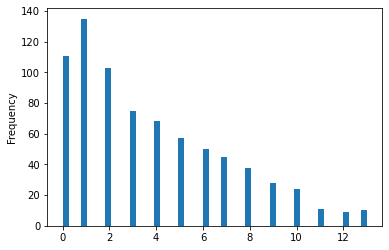

In [7]:
high, bottom = detect_outlier(df['Pregnancies'])
df  = df[(df['Pregnancies'] > bottom) & (df['Pregnancies'] < high)]
df['Pregnancies'].plot(kind='box')
plt.figure()
df['Pregnancies'].plot(kind='hist', bins=50)

In [8]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[764 rows x 9 columns]

0.25:  24.0
0.75: 40.25
bottom: -0.375
ceiling: 64.625


<AxesSubplot:ylabel='Frequency'>

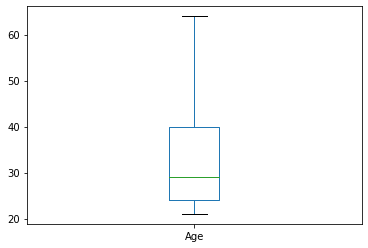

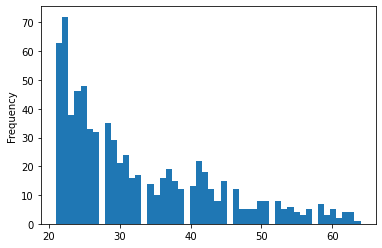

In [9]:
high, bottom = detect_outlier(df['Age'])
df  = df[(df['Age'] > bottom) & (df['Age'] < high)]
df['Age'].plot(kind='box')
plt.figure()
df['Age'].plot(kind='hist', bins=50)

In [10]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[748 rows x 9 columns]

0.25:  99.0
0.75: 139.25
bottom: 38.625
ceiling: 199.625


<AxesSubplot:ylabel='Frequency'>

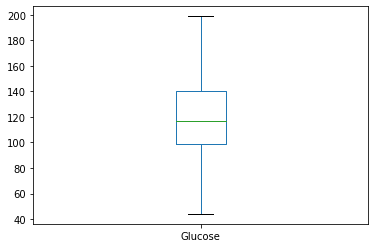

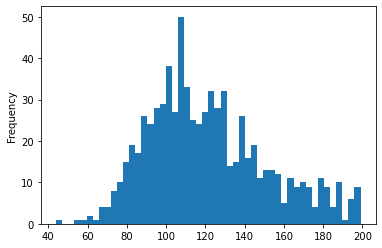

In [11]:
high, bottom = detect_outlier(df['Glucose'])
df  = df[(df['Glucose'] > bottom) & (df['Glucose'] < high)]
df['Glucose'].plot(kind='box')
plt.figure()
df['Glucose'].plot(kind='hist', bins=50)

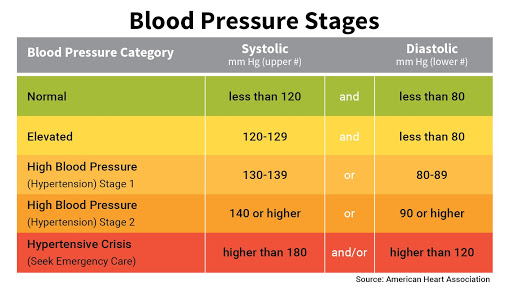

0.25:  62.0
0.75: 80.0
bottom: 35.0
ceiling: 107.0


<AxesSubplot:ylabel='Frequency'>

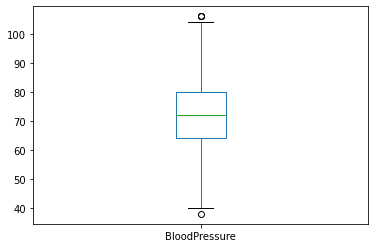

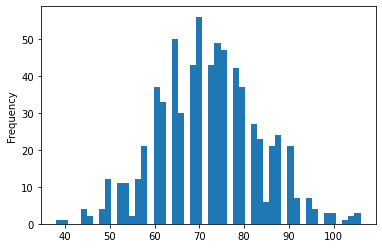

In [12]:
high, bottom = detect_outlier(df['BloodPressure'])
df  = df[(df['BloodPressure'] > bottom) & (df['BloodPressure'] < high)]
df['BloodPressure'].plot(kind='box')
plt.figure()
df['BloodPressure'].plot(kind='hist', bins=50)

### If Look At the Bottom See Sime Negative Values But 0 Is Bigger Than Negative Value So In This Particular Way Delete It By Hand Like This :

Trustable_Mean: 21.275
Not_Trustable_Mean: 21.65
0.25:  21.275
0.75: 33.0
bottom: 3.6874999999999964
ceiling: 50.587500000000006


<AxesSubplot:ylabel='Frequency'>

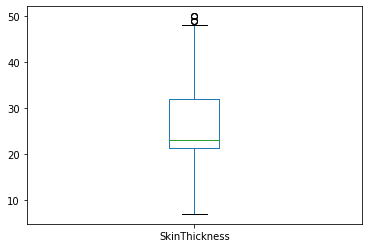

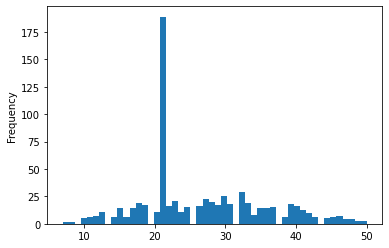

In [13]:
df['SkinThickness'].value_counts()
# If We Remove Zero We loss More information So Replace It By Trim_Mean
Trust_mean = stats.trim_mean(df['SkinThickness'], 0.1)
print('Trustable_Mean:',Trust_mean)
print('Not_Trustable_Mean:',df['SkinThickness'].mean())

df['SkinThickness'] = df['SkinThickness'].replace(0, Trust_mean)

high, bottom = detect_outlier(df['SkinThickness'])
df  = df[(df['SkinThickness'] > bottom) & (df['SkinThickness'] < high)]
df['SkinThickness'].plot(kind='box')
plt.figure()
df['SkinThickness'].plot(kind='hist', bins=50)

### If Look At the Bottom See Sime Negative Values But 0 Is Bigger Than Negative Value So In This Particular Way Delete It By Hand Like This :

Trustable_Mean: 53.12289156626506
0.25:  53.94
0.75: 135.0
bottom: -67.65
ceiling: 256.59000000000003


<AxesSubplot:ylabel='Frequency'>

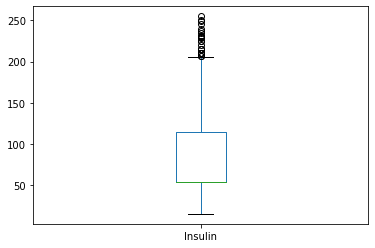

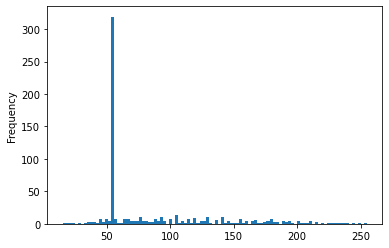

In [14]:
df['Insulin'].value_counts()
# If We Remove Zero We loss More information So Replace It By Trim_Mean
print('Trustable_Mean:', stats.trim_mean(df['Insulin'], 0.2))
df['Insulin'] = df['Insulin'].replace(0, 53.94)

high, bottom = detect_outlier(df['Insulin'])
df  = df[(df['Insulin'] > bottom) & (df['Insulin'] < high)]
df['Insulin'].plot(kind='box')
plt.figure()
df['Insulin'].plot(kind='hist', bins=100)

### You Can Trust To Trim_mean See The Different Above:
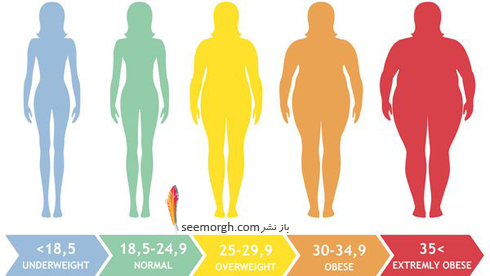

0.25:  27.174999999999997
0.75: 35.9
bottom: 14.087499999999995
ceiling: 48.9875


<AxesSubplot:ylabel='Frequency'>

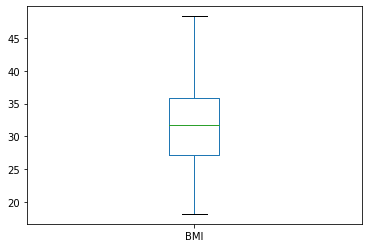

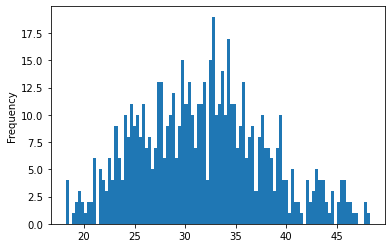

In [15]:
high, bottom = detect_outlier(df['BMI'])
df  = df[(df['BMI'] > bottom) & (df['BMI'] < high)]
df['BMI'].plot(kind='box')
plt.figure()
df['BMI'].plot(kind='hist', bins=100)

0.25:  0.24475
0.75: 0.60825
bottom: -0.3004999999999999
ceiling: 1.1534999999999997


<AxesSubplot:ylabel='Frequency'>

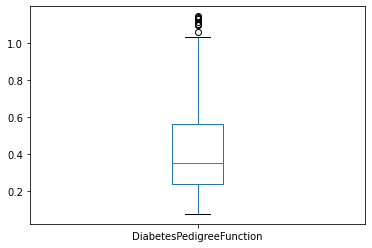

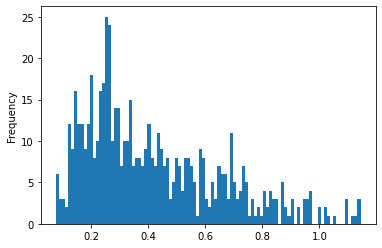

In [16]:
high, bottom = detect_outlier(df['DiabetesPedigreeFunction'])
df  = df[(df['DiabetesPedigreeFunction'] > bottom) & (df['DiabetesPedigreeFunction'] < high)]
df['DiabetesPedigreeFunction'].plot(kind='box')
plt.figure()
df['DiabetesPedigreeFunction'].plot(kind='hist', bins=100)

## Now it's More Clear Than Before 
### Look the Range Of unsulin Before Was more than 350 now Be 150 

Text(0.5, 1.0, 'Age Outlier')

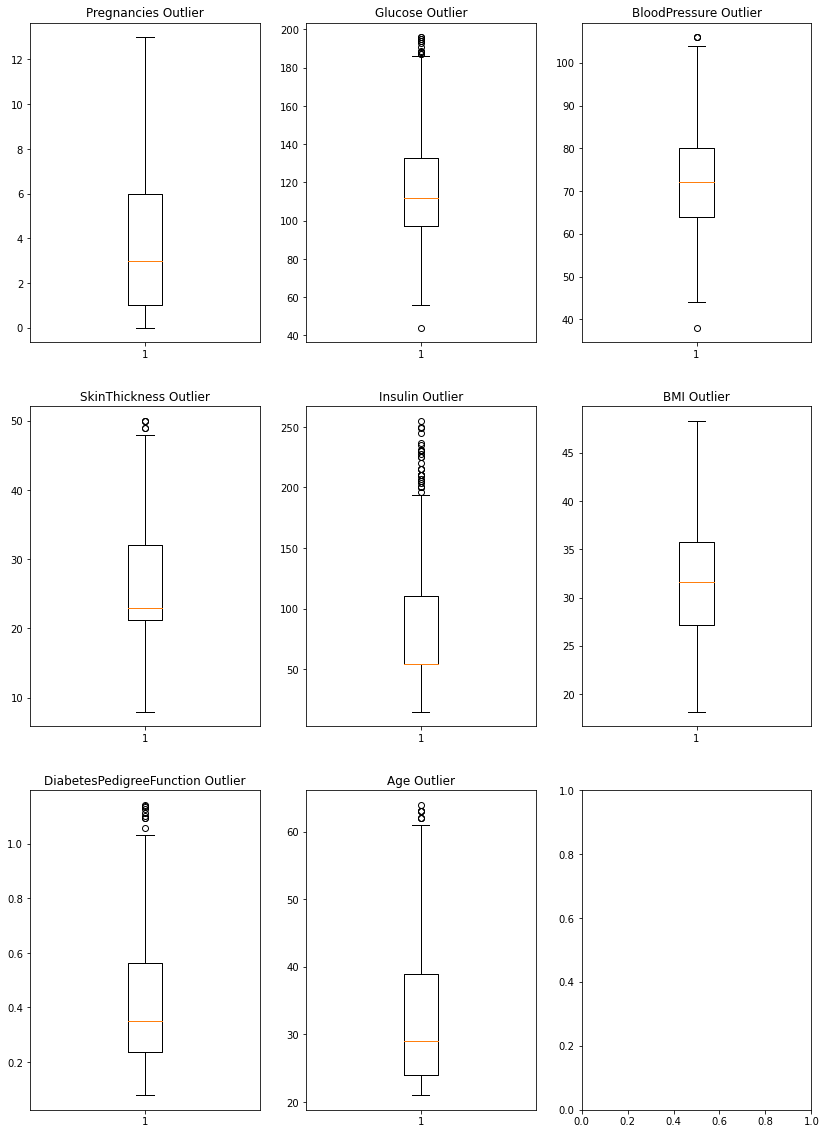

In [17]:
fig, [[ax1, ax2, ax3], [ax4 ,ax5, ax6], [ax7, ax8, ax9 ]] = plt.subplots(nrows=3, ncols=3,
                               figsize=(14, 20))

ax1.boxplot(df['Pregnancies'])
ax1.set_title('Pregnancies Outlier')

ax2.boxplot(df['Glucose'])
ax2.set_title('Glucose Outlier')

ax3.boxplot(df['BloodPressure'])
ax3.set_title('BloodPressure Outlier')

ax4.boxplot(df['SkinThickness'])
ax4.set_title('SkinThickness Outlier')

ax5.boxplot(df['Insulin'])
ax5.set_title('Insulin Outlier')

ax6.boxplot(df['BMI'])
ax6.set_title('BMI Outlier')

ax7.boxplot(df['DiabetesPedigreeFunction'])
ax7.set_title('DiabetesPedigreeFunction Outlier')

ax8.boxplot(df['Age'])
ax8.set_title('Age Outlier')


همبستگی یک عدد بین رنج 1و -1 که به معنی همبستگی دو ستون است یعنی یا زیاد شدن یک ستون ستون دیگر افزایش یافته یا کاهش  اگر عدد منفی شد به معنی بد بودن نیست یعنی با افزایش ستونی مقدار ستئن دیگر ما کاهش داشته است 
و اگر مثبت باشد یعنی با افزایش ستونی ستون دیگر ما هم افزایش داشته است انواع مختلف هبستگی 
اولین آن پیرسون است دومین آن اسپیرمن که در این حالت ابتدا اعداد مرتب میشود سپس رتبه بندی میشوند و با توجه به رتبه ها همبستگی حساب میشود 
سومین آنها کندال تا که در اینجا هم ابتدا رنک بندی میشود و جفت جفت مقایسه انجام میدهد یعنی اگر هم قد و هم وزن کم شدن 1 واحد کندال داریم ولی اگر وزن کم شد ولی قد فرقی نکرد در اینجا یا یک واحد ناسازگاری داریم 
و نحوه محاسبه فرمول آن در اینترنت موجود است 

حالا نکته اساسی کی از کدام استفاده کنیم؟ 
اسپیرمن کمتر مورد استفاده واقع میشود 
وقتی ستون های ما کانتینوس باشد یعنی عددی باشد از پیرسون استفاده میکنیم به شرطی که داده زیاد غیر خطی نباشند و قابلیت هوموسداستیسیتی داشته باشیم یعنی واریانس یکنواخت باشد و پراکندگی یکسان و نویز نداشته باشیم 

اگر ستون ما رنک بندی بودند و نویز هم موجود بود بهتر است از کندالس تا استفاده کنیمن

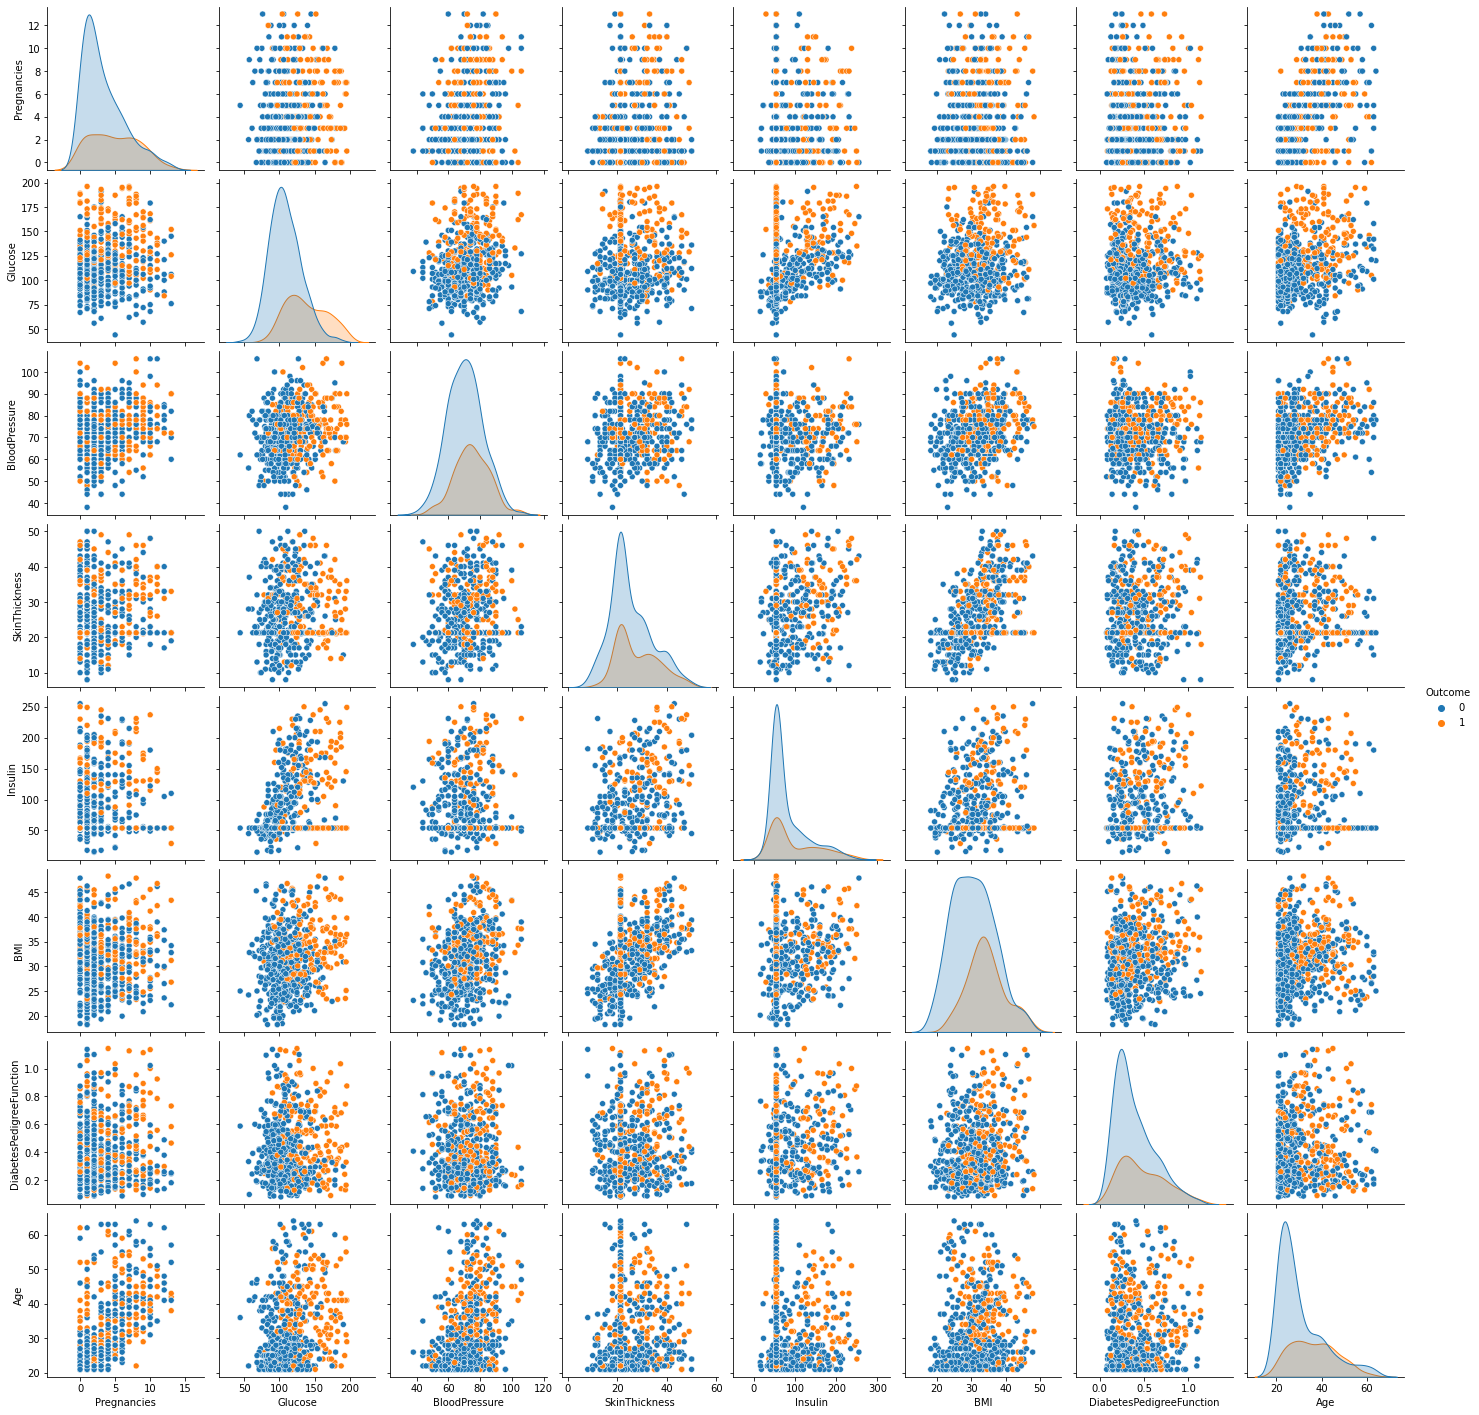

In [20]:
sns.pairplot(df, hue='Outcome')
# برای فهمیدن خطی و غیر خطی بودن که در اینجا زیاد خطی نیستن 

method :pearson, kendal, spearman


<AxesSubplot:>

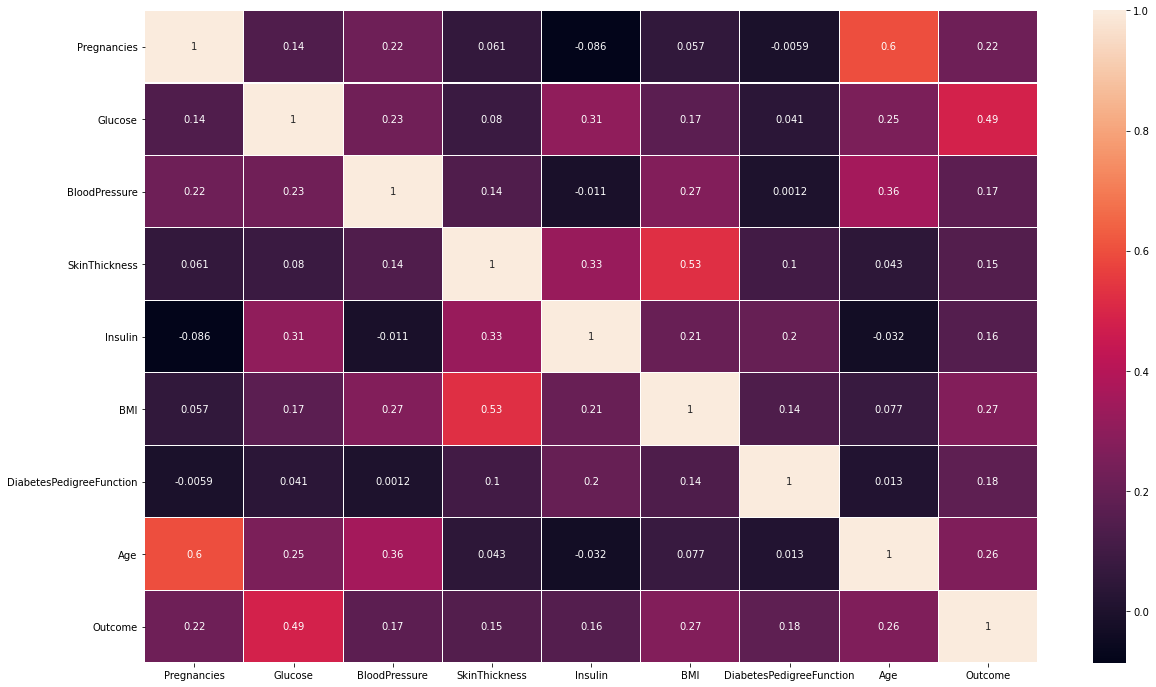

In [19]:
plt.figure(figsize=(20, 12))
print('method :pearson, kendal, spearman')
sns.heatmap(df.corr(method='pearson'), annot=True, linewidths=0.1)

In [24]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

به روش مختلف داده استاندار کردیم یعنی در یک محدوده قرار داریم حتی میشود از هر روش چندین بار استفاده کنیم و مشکلی نیست 

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max = MinMaxScaler()
stn = StandardScaler()
x_min_max = min_max.fit_transform(x)
x_finall = stn.fit_transform(x_min_max)

In [34]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('standard', StandardScaler()), ('min_max', MinMaxScaler())])
x1_finall = pipe.fit_transform(x)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_finall, y)

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rn = RandomForestClassifier(n_estimators=100, max_depth=3)
rn.fit(x_train, y_train)
print(rn.score(x_train, y_train))
predict = rn.predict(x_test)
print(accuracy_score(y_test, predict))
confusion_matrix(predict, y_test)

0.8084632516703786
0.7666666666666667


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x1_finall, y)
rn.fit(x_train, y_train)
print(rn.score(x_train, y_train))
predict = rn.predict(x_test)
print(accuracy_score(y_test, predict))

0.8151447661469933
0.8066666666666666


In [62]:
confusion_matrix(predict, y_test)

array([[104,  26],
       [  3,  17]], dtype=int64)